In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/sruja/OneDrive/Desktop/ipl.csv")

In [3]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.shape

(76014, 15)

In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [9]:
df.drop(['mid','venue','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [10]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
consistent_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore','Rajasthan Royals','Kings XI Punjab','Delhi Daredevils']
df_filtered = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)]
df_filtered.head()


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
df_filtered = df_filtered[df_filtered['overs'] > 5]
df_filtered.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered.head()


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
correlation_matrix = df_filtered.corr()
correlation_matrix


,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.358372,0.879600,0.580687,0.108380,0.389205
wickets,0.358372,1.000000,0.632636,-0.210443,0.630084,-0.456932
overs,0.879600,0.632636,1.000000,0.282725,0.213834,0.031838
runs_last_5,0.580687,-0.210443,0.282725,1.000000,-0.285347,0.583707
wickets_last_5,0.108380,0.630084,0.213834,-0.285347,1.000000,-0.301496
total,0.389205,-0.456932,0.031838,0.583707,-0.301496,1.000000


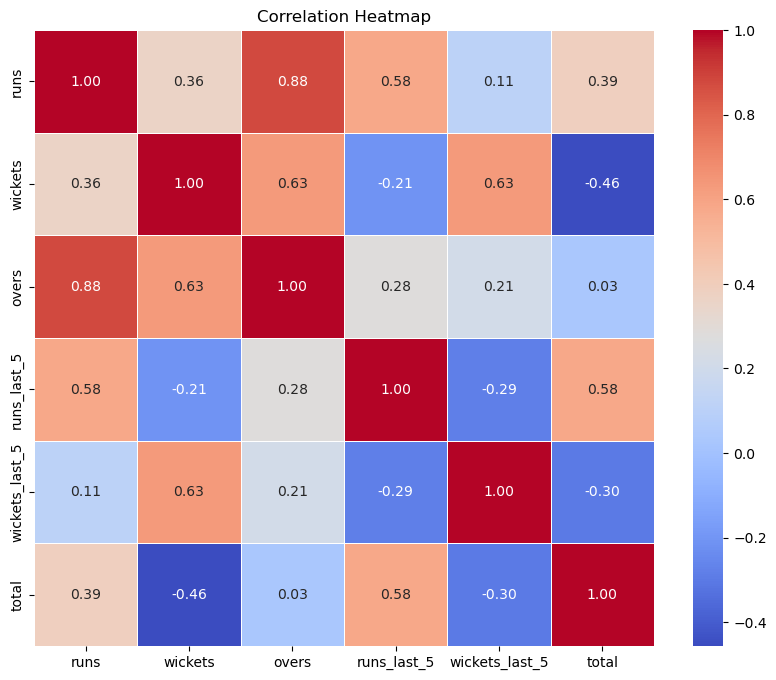

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df_encoded = pd.get_dummies(df_filtered, columns=['bat_team', 'bowl_team'], drop_first=True)
df_encoded.head()


,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,0,0,0,0,0,0,0,0,1
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,0,0,0,0,0,0,0,0,1


In [17]:
df_encoded['year'] = df_encoded['date'].dt.year
df_encoded.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,year
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,0,0,0,0,0,0,0,0,1,2008
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1,2008
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1,2008
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,0,0,0,0,0,0,0,0,1,2008
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,0,0,0,0,0,0,0,0,1,2008


In [18]:
train_data = df_encoded[df_encoded['year'] < 2017] 
test_data = df_encoded[df_encoded['year'] == 2017]  

In [19]:
X_train = train_data.drop(columns=['total', 'year', 'date'])  # Drop 'total', 'year', and 'date' columns
y_train = train_data['total']

X_test = test_data.drop(columns=['total', 'year', 'date'])  # Drop 'total', 'year', and 'date' columns
y_test = test_data['total']

In [20]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,61,0,5.1,59,0,0,0,1,0,0,0,0,0,0,0,0,1
33,61,1,5.2,59,1,0,0,1,0,0,0,0,0,0,0,0,1
34,61,1,5.3,59,1,0,0,1,0,0,0,0,0,0,0,0,1
35,61,1,5.4,59,1,0,0,1,0,0,0,0,0,0,0,0,1
36,61,1,5.5,58,1,0,0,1,0,0,0,0,0,0,0,0,1


In [21]:
y_train.head()

32    222
33    222
34    222
35    222
36    222
Name: total, dtype: int64

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - R2: {r2_linear}")
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(f"Linear Regression - MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}")

Linear Regression - R2: 0.7304655008705454
Linear Regression - MAE: 13.06, MSE: 293.76, RMSE: 17.14


In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression -  R2: {r2_dt}")
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f"Decision Tree Regression - MAE: {mae_dt:.2f}, MSE: {mse_dt:.2f}, RMSE: {rmse_dt:.2f}")

Decision Tree Regression -  R2: 0.5029424716095469
Decision Tree Regression - MAE: 17.34, MSE: 541.73, RMSE: 23.28


In [24]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression  R2: {r2_rf}")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest Regression - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest Regression  R2: 0.6164455730819495
Random Forest Regression - MAE: 15.98, MSE: 418.03, RMSE: 20.45


In [25]:
ada_model = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print(f"AdaBoost Regressor - MSE: {mse_ada}, R2: {r2_ada}")
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
print(f"AdaBoost Regression - MAE: {mae_ada:.2f}, MSE: {mse_ada:.2f}, RMSE: {rmse_ada:.2f}")

AdaBoost Regressor - MSE: 282.3601190559404, R2: 0.7409240318396779
AdaBoost Regression - MAE: 12.83, MSE: 282.36, RMSE: 16.80


In [26]:

linear_model.fit(X_train, y_train)
import numpy as np

def predict_score(bat_team, bowl_team, overs, runs, wickets, runs_last_5, wickets_last_5, model, team_columns):
   
    features = {
        'overs': overs,
        'runs': runs,
        'wickets': wickets,
        'runs_last_5': runs_last_5,
        'wickets_last_5': wickets_last_5
    }

    for team in team_columns:
        if team == f'bat_team_{bat_team}':
            features[team] = 1
        elif team == f'bowl_team_{bowl_team}':
            features[team] = 1
        else:
            features[team] = 0
    
    feature_array = np.array([[
        features[col] for col in team_columns
    ]])
    
    predicted_score = model.predict(feature_array)[0]
    
    return predicted_score


In [27]:
team_columns = [col for col in X_train.columns if col.startswith('bat_team') or col.startswith('bowl_team')] + ['overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5']
bat_team = 'Mumbai Indians'
bowl_team = 'Royal Challengers Bangalore'
overs = 15
runs = 120
wickets = 3
runs_last_5 = 30
wickets_last_5 = 1

predicted_score = predict_score(bat_team, bowl_team, overs, runs, wickets, runs_last_5, wickets_last_5, linear_model, team_columns)
print(f"Predicted total score for the match: {predicted_score:.2f}")


Predicted total score for the match: 166.67


C:\Users\sruja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
